# 2.2.1.1 - 2D Rotation Matrix

This section will demonstrate how to rotate a matrix in 2D. We will start with two frames ({A} and {B}) with a common origin but with different orientation. Frame {B} is obtained by rotating frame {A} by $\theta$ in the positive (counter-clockwise) direction about the origin. These frames can be expressed in terms of the basis vectors of frame {A} as the following:

\begin{align*}
    \vec{x}_B = \vec{x}_Acos\theta + \vec{y}_Asin \theta\\
    \vec{y}_B = -\vec{x}_Asin\theta + \vec{y}_Acos\theta
\end{align*}

or in matrix form as:

\begin{align*}
    \begin{bmatrix} \vec{x}_B & \vec{y}_B \end{bmatrix} = \begin{bmatrix} \vec{x}_A & \vec{y}_A \end{bmatrix} \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}
\end{align*}

There is a special type of matrix called a *rotation matrix* that transforms frame {A}, described by $ \begin{bmatrix} \vec{x}_A & \vec{y}_A \end{bmatrix} $, into frame {B}, described by $ \begin{bmatrix} \vec{x}_B & \vec{y}_B \end{bmatrix} $:

\begin{align*}
    ^A\vec{R}_B(\theta) = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}
\end{align*}

Rotation matricies have special properties:
* They are vectors that define the axes of the rotated 2D coordinate frame
* Have unit length and orthogonal/orthonormal
* Its inverse is the same as its transpose: $ \vec{R}^{-1} = \vec{R}^T $
* The matrix-vector product preserves the length and relative orientation of vectors. Therefore, the determinant is +1
* It is a member of the Special Orthogonal (SO) group of 2D, which we write as $ \vec{R} \in \vec{SO}(2) \subset \Re^{2x2} $

We can write a coordinate vector as a linear combination of the basis vectors of the reference frame, which in matrix form, can be written as follows:

\begin{align*}
    ^A\vec{p} = \begin{bmatrix} \vec{x}_A & \vec{y}_A \end{bmatrix} \begin{bmatrix} ^Ap_x \\ ^Ap_y \end{bmatrix} \\
    ^B\vec{p} = \begin{bmatrix} \vec{x}_B & \vec{y}_B \end{bmatrix} \begin{bmatrix} ^Bp_x \\ ^Bp_y \end{bmatrix} \\
    \begin{bmatrix} \vec{x}_A & \vec{y}_A \end{bmatrix} \begin{bmatrix} ^Ap_x \\ ^Ap_y \end{bmatrix} = \space^A\vec{p} = \begin{bmatrix} \vec{x}_A & \vec{y}_A \end{bmatrix} \space^A\vec{R}_B(\theta) \begin{bmatrix} ^Bp_x \\ ^Bp_y \end{bmatrix} \\
    \begin{bmatrix} ^Ap_x \\ ^Ap_y \end{bmatrix} =  \space^A\vec{R}_B(\theta) \begin{bmatrix} ^Bp_x \\ ^Bp_y \end{bmatrix}  
\end{align*}

$ \xi $ as an $ \vec{SO}(2) $ matrix: For the case of pure rotation in 2D, $ $ can be implemented by a rotation matrix $ \vec{R} \in \vec{SO}(2) $. Its implementation is as follows:

|Term|Expression|Explanation|
|---|---|---|
| Compostion | $ \vec{\xi}_1 \oplus \vec{\xi}_2 \rightarrow \vec{R}_1\vec{R}_2 $ | Matrix Multiplication |
| Inverse | $ \ominus \vec{\xi} \rightarrow \vec{R}^{-1} = \vec{R}^T $ | Matrix Transpose |
| Identity | $ \varnothing \rightarrow \vec{R}(0) = \vec{1}_{2x2} $ | Identity Matrix |
| Vector-Transform | $ \vec{\xi} \cdot \vec{v} \rightarrow \vec{Rv} $ | Matrix-Vector Product |

Computation is commutative, that is: $ \vec{R}_1\vec{R}_2 = \vec{R}_2\vec{R}_1 $ and $ \vec{R}(-\theta) = \vec{R}^T(\theta) $.

Below shows how this is done using the rvctool; however, first we must have import the rvctool into our notebook:

In [2]:
# This imports our RVC Textbook with it's tools
import RVC3 as rvc
import sys, os.path
sys.path.append(os.path.join(rvc.__path__[0], 'examples'))

import numpy as np
from scipy import linalg, stats
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from machinevisiontoolbox.base import *
from machinevisiontoolbox import *
from spatialmath.base import *
from spatialmath import *

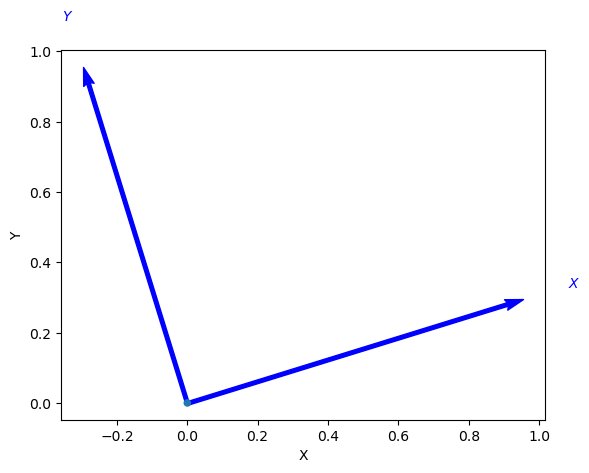

In [5]:
# This creates an SO(2) rotation (angle in radians) and plots it
R = rot2(.3)
trplot2(R);

In [6]:
# Below demonstrates some of the above properties:
np.linalg.det(R)    # Determinant is equal to one

np.linalg.det(R @ R)    # Product of two rotation matricies is also a rotation matrix
                        # The @ operator indicates matrix multiplication of NumPy arrays

0.9999999999999998

In [4]:
# The toolbox can support symbolic mathematics
# For this, SymPy needs to be installed
from sympy import Symbol, Matrix, simplify
theta = Symbol('theta')

1

In [9]:
R = Matrix(rot2(theta))     # Converts to SymPy matrix:
                            # Matrix = [ cos(theta)  -sin(theta)]
                            #          [ sin(theta)  cos(theta)]

simplify(R * R)
                            # Matrix = [ cos(2 * theta)  -sin(2 * theta)]
                            #          [ sin(2 * theta)  cos(2 * theta)]

R.det()     # sin(theta)**2 + cos(theta)**2

R.det().simplify()

1

# 2.2.2.1 - 2D Homogenous Transformation Matrix

This section will describe the relative pose of the frames as shown in the firgure below. We will need to account for the translation between the origins of the frams as well as the rotation.

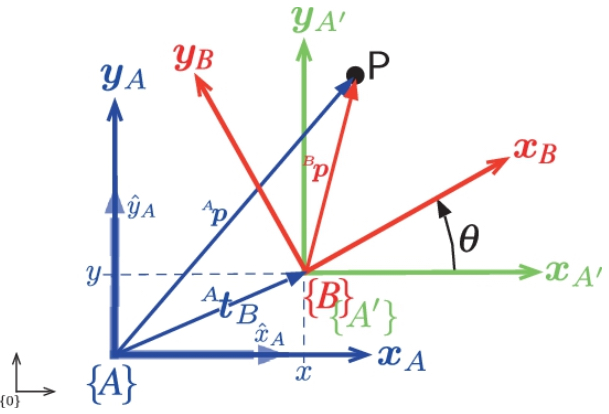

The first step is to transform the coordinate vector $ \space^B\vec{p} = (\space^Bx, \space^By) $, with respect to frame {B}, to $ \space^{A'}\vec{p} = (\space^{A'}x, \space^{A'}y) $ with respect to frame {A'} using the rotation matrix $ \space^{A'}\vec{R}_B(\theta) $ which is a function of the orientation $ \theta $. Since frames {A'} and {A} are parallel, the coordinate vector $ \space^A\vec{p} \space $ is obtained by adding $ \space^A\vec{t}_B = (t_x, t_y)^T $ to $ \space^{A'}\vec{p} \space $ like so:

\begin{align*}
    \begin{bmatrix} \space^Ax \\ \space^Ay \end{bmatrix} = \begin{bmatrix} \space^{A'}x \\ \space^{A'} \end{bmatrix} + \begin{bmatrix} t_x \\ t_y \end{bmatrix} \\
    = \begin{bmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{bmatrix} \begin{bmatrix} \space^Bx \\ \space^By \end{bmatrix} + \begin{bmatrix} t_x \\ t_y \end{bmatrix} \\
    = \begin{bmatrix} cos(\theta) & -sin(\theta) & t_x \\ sin(\theta) & cos(\theta) & t_y \end{bmatrix} \begin{bmatrix} \space^Bx \\ \space^By \\ 1 \end{bmatrix} \\
    \begin{bmatrix} \space^Ax \\ \space^Ay \\ 1 \end{bmatrix} = \begin{bmatrix} \space^A\vec{R}_B & \space^A\vec{t}_B \\ \vec{0}_{1x2} & 1 \end{bmatrix} \begin{bmatrix} \space^Bx \\ \space^By \\ 1 \end{bmatrix}
\end{align*}


Where $ \space^A\vec{t}_B $ is the translation of the origin of frame {B} with respect to frame {A} and $ \space^A\vec{R}_B $ is the orientation of frame {B} with respect to frame {A}.

If we consider the homogeneous transformation as a relative pose or rigid-body motion, this corresponds to thte coordinate frame being first translated by $ \space^A\vec{t}_B $ with respect to frame {A}, and then rotated by $ \space^A\vec{R}_B(\theta) $.

The coordinate vectors for point $ p $ are expressed in homogeneous form and denote it as follows:

\begin{align*}
    \space^A\tilde{p} = \begin{bmatrix} \space^A\vec{R}_B(\theta) & \space^A\vec{t}_B \\ \vec{0}_{1x2} & 1 \end{bmatrix} \space^B\tilde{p} \\
    = \space^A\vec{T}_B \space^B\tilde{p}
\end{align*}

$ \space^A\vec{T}_B $ is referred to as a homogeneous transformation. The matrix has a very specific structure and belongs to the Special Euclidean (SE) group in 2D where $ \vec{T} \in \vec{SE}(2) \subset \Re^{3x3} $

$ \xi $ as an $ \vec{SE}(2) $ matrix: For the case of rotation and translation in 2D, $ \xi $ can be implemented by a homogeneous tranformation matrix $ \vec{T} \in \vec{SE}(2) \subset \Re^{3x3} $ which is sometiems written as an ordered pair $ (\vec{R}, \vec{t}) \in \vec{SO}(2) x \Re^2 $. This can be implemented as:

|Term|Expression|Explanation|
|---|---|---|
| Compostion | $ \vec{\xi}_1 \oplus \vec{\xi}_2 \rightarrow \vec{T}_1\vec{T}_2 = \begin{bmatrix} \vec{R}_1\vec{R}_2 & \vec{t}_1 + \vec{R}_1\vec{t}_2 \\ \vec{0}_{1x2} & 1 \end{bmatrix} $ | Matrix Multiplication |
| Inverse | $ \ominus \vec{\xi} $ | Matrix Transpose |
| Identity | $ \varnothing $ | Identity Matrix |
| Vector-Transform | $ \vec{\xi} \cdot \vec{v} $ | Matrix-Vector Product |

# 2.2.2.2 - Rotating a Coordinate Frame

# 2.3.1.1 - 3D Rotation Matrix

# 2.3.1.2 - Three-Angle Representations

# 2.3.1.4 - Two-Vector Representation

# 2.3.1.5 - Rotation About an Arbitrary Vector

# 2.3.2.1 - Homogeneous Transformation Matrix